In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## In Data Analysis you should analyze DataSet to find out below stuff

    1. Missing value
    2. All the numerical variables
    3. Distrubution of the numerical variables
    4. Catagorical variables
    5. Cardinality of catagorical variables
    6. Outliers
    7. Relationship between independent and dependent features(SalesPrice) 

### Missing Values

In [3]:
## Check the percentage of NAN values present in each features
## Step-1 : Make the list of features which has missing values
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

## Step-2 : Print Features with percentage of missing values
for features in features_with_na:
    print(features, np.round(dataset[features].isnull().mean()*100,4), ' % missing values ')

LotFrontage 17.7397  % missing values 
Alley 93.7671  % missing values 
MasVnrType 0.5479  % missing values 
MasVnrArea 0.5479  % missing values 
BsmtQual 2.5342  % missing values 
BsmtCond 2.5342  % missing values 
BsmtExposure 2.6027  % missing values 
BsmtFinType1 2.5342  % missing values 
BsmtFinType2 2.6027  % missing values 
FireplaceQu 47.2603  % missing values 
GarageType 5.5479  % missing values 
GarageYrBlt 5.5479  % missing values 
GarageFinish 5.5479  % missing values 
GarageQual 5.5479  % missing values 
GarageCond 5.5479  % missing values 
PoolQC 99.5205  % missing values 
Fence 80.7534  % missing values 
MiscFeature 96.3014  % missing values 


### Since there are many missing values, we need to find the relationship between missing values and sales price

    plotting some diagram for this relationship

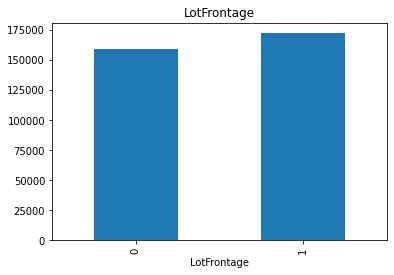

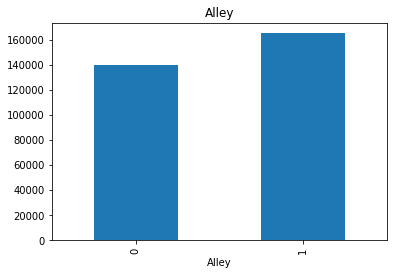

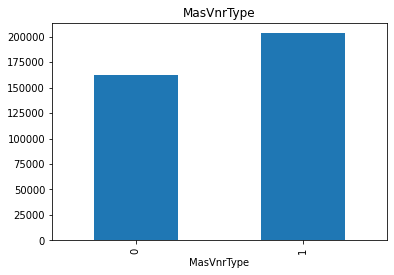

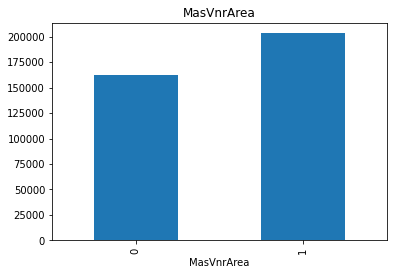

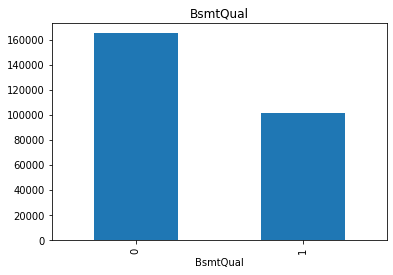

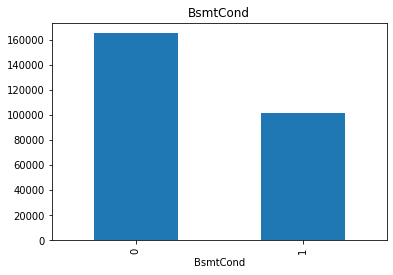

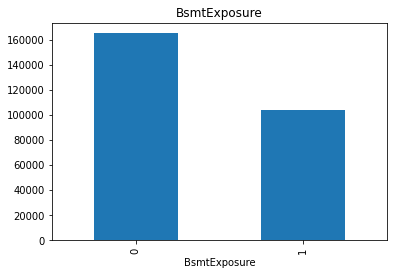

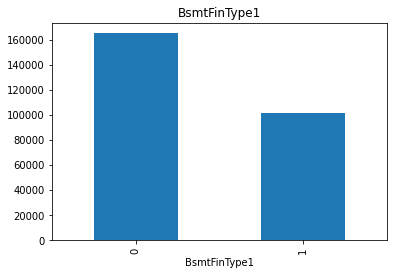

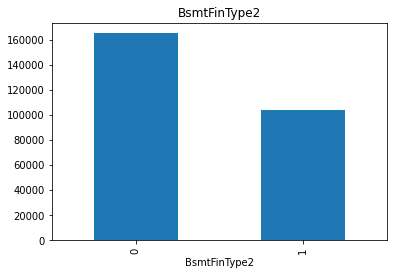

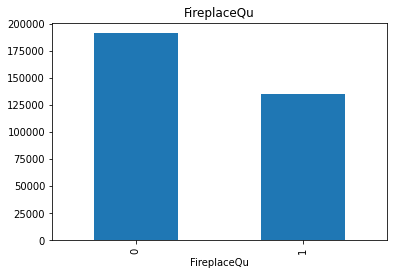

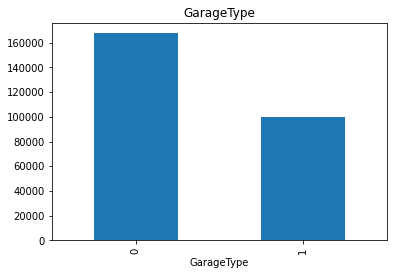

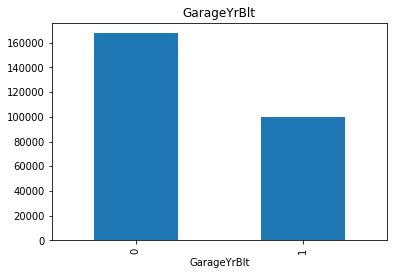

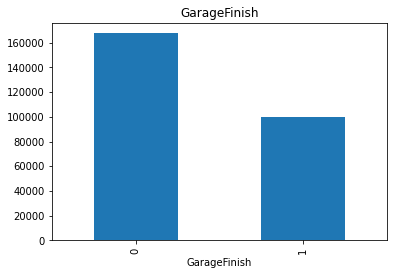

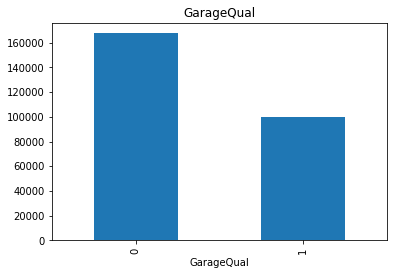

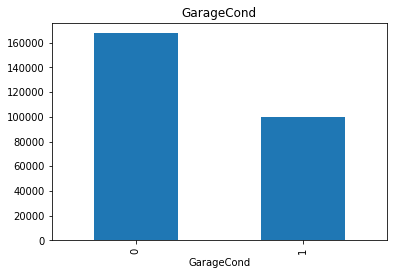

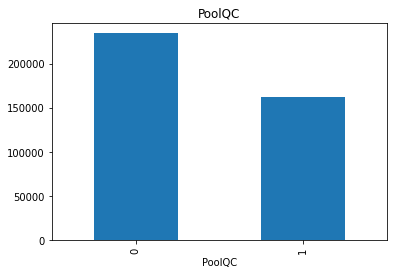

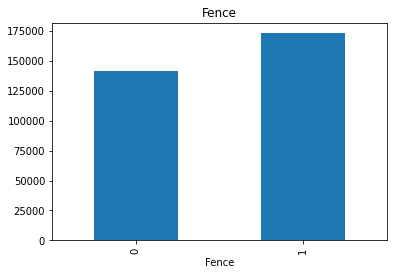

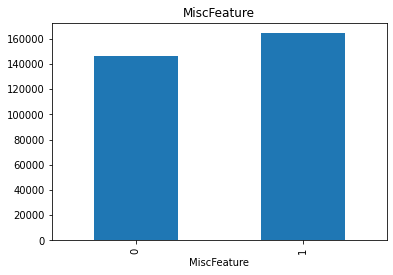

In [4]:
for features in features_with_na:
    data = dataset.copy()
    
    #Let's make a variable that indicates 1 if observation has missing value
    data[features] = np.where(data[features].isnull(),1,0)
    
    #Let's calculate the mean Salesprice where the information is missing or present
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

Here relation between dependent variable and missing values is clearly visible

### Numerical Variables

In [5]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes!='O'] ## 'O' for object

print("No. of numerical features = ",len(numerical_features))
dataset[numerical_features]

No. of numerical features =  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


### Temporal variables (Eg. DateTime variables)

In [6]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ] 

print("No. of numerical features = ",len(year_feature))
dataset[year_feature]

No. of numerical features =  4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [7]:
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

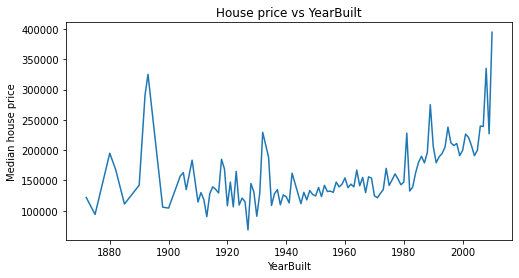

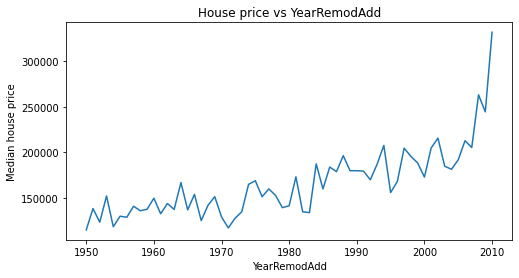

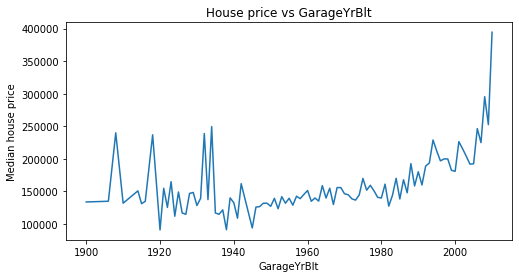

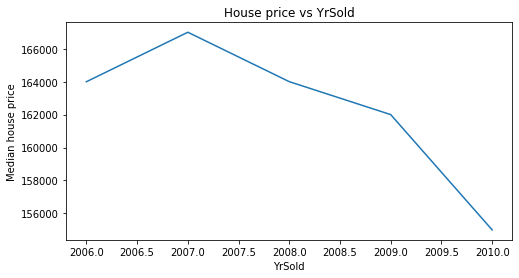

In [8]:
for feature in year_feature:
    f=plt.figure()
    f.set_figwidth(8)
    dataset.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median house price')
    plt.title(f'House price vs {feature}')
    plt.show()

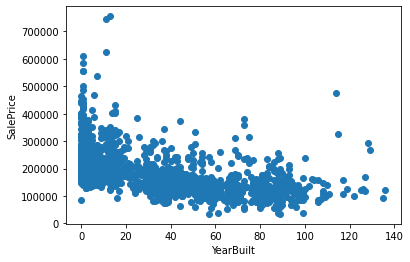

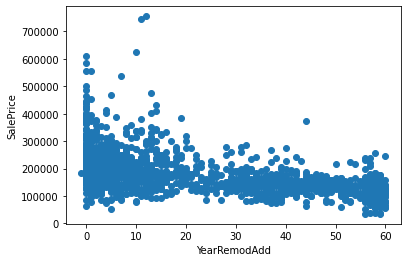

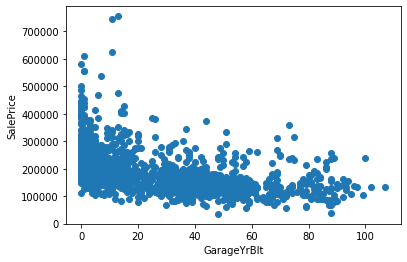

In [9]:
## Here we will compare all year features with saleprice

for feature in year_feature:
    if feature!='YrSold':
        data = dataset.copy()
        ## Here we will calculate the difference b/w year variable and year the house was sold
        data[feature] = data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [10]:
## Numerical variables are usually of two type:
## 1.Contunuous variables, 2.Discrete variables:

discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print('Length of discrete features is = ',len(discrete_features))
print(discrete_features)

Length of discrete features is =  17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


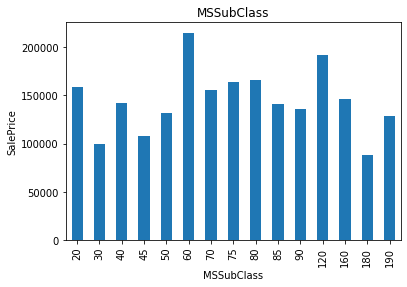

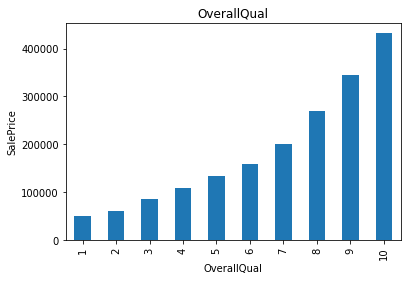

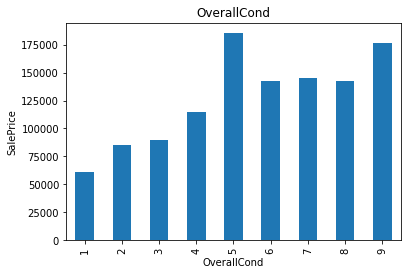

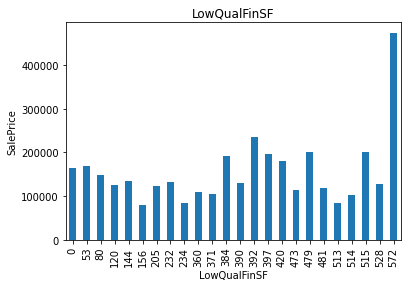

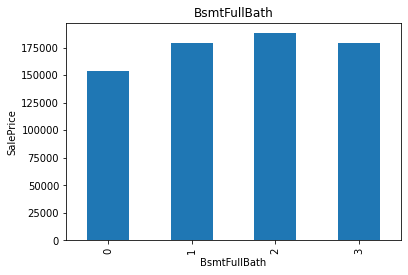

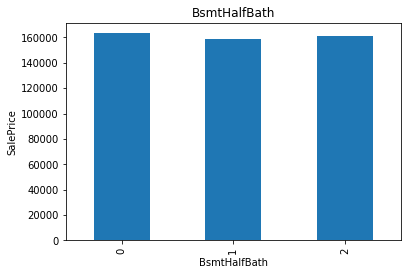

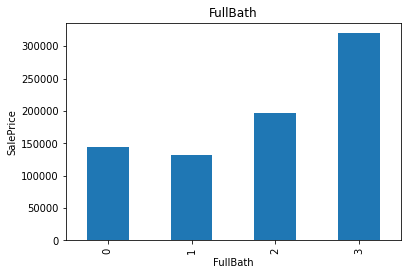

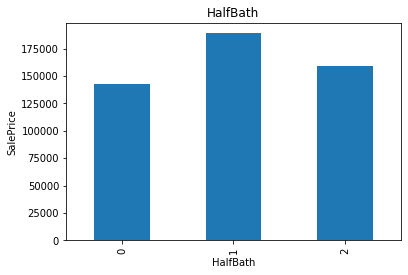

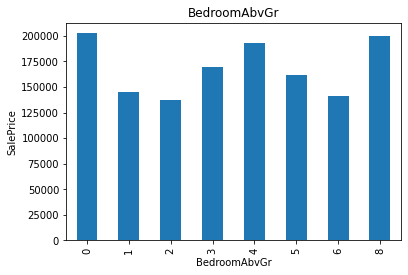

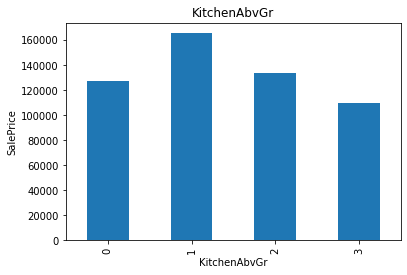

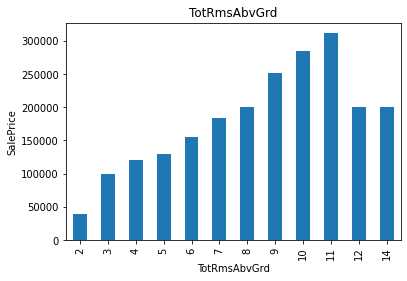

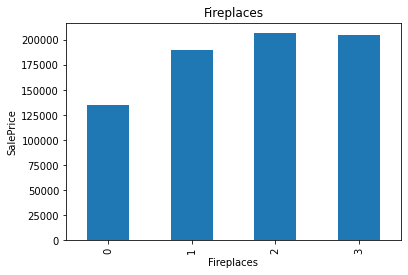

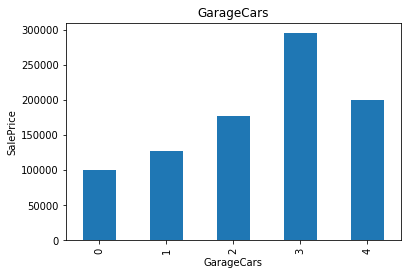

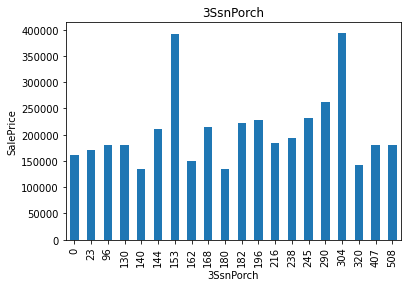

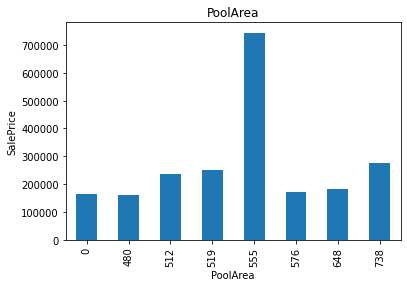

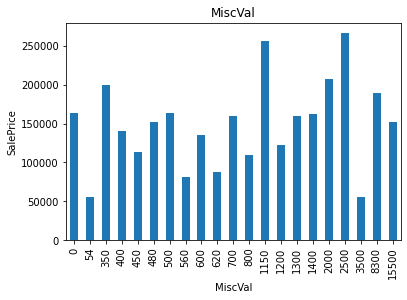

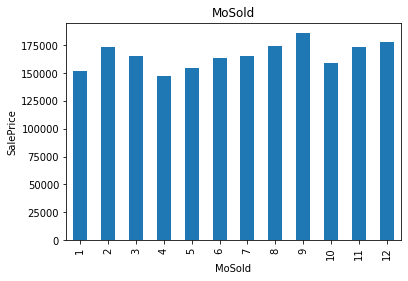

In [11]:
## Let's find relationship b/w them and Sale Price
for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show() 

### Continuous variables

In [12]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+year_feature+['Id']]
print('Length of discrete features is = ',len(continuous_features))
print(continuous_features)

Length of discrete features is =  16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


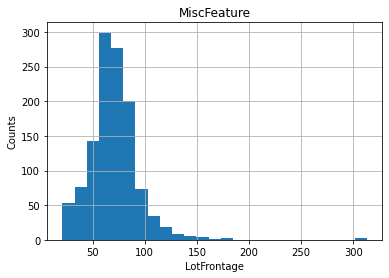

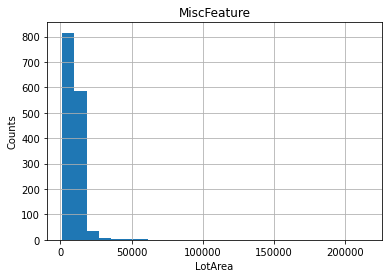

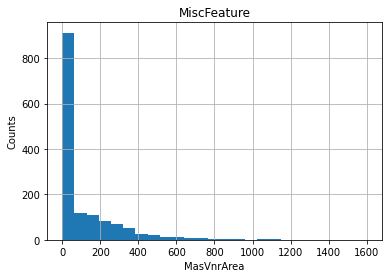

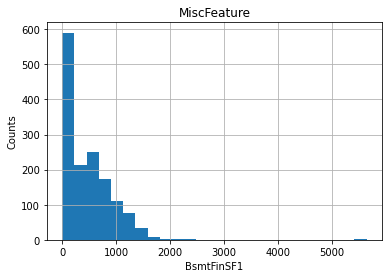

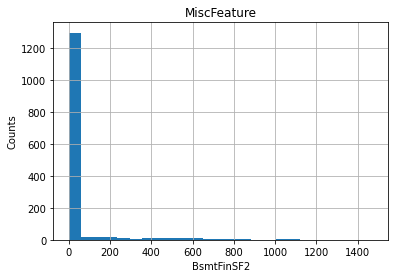

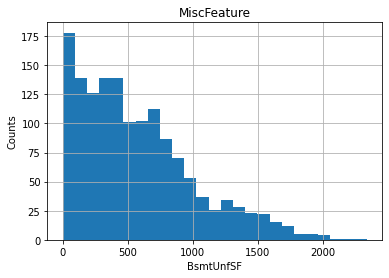

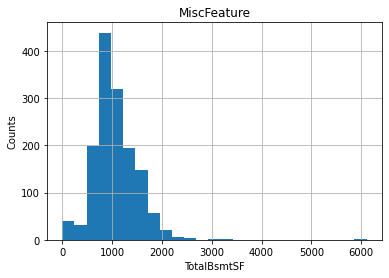

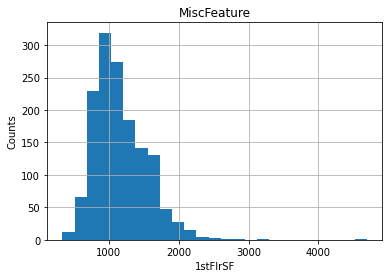

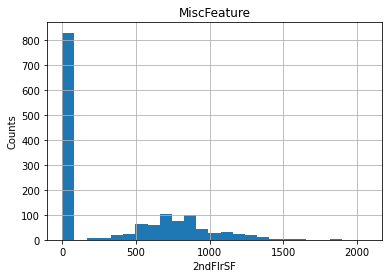

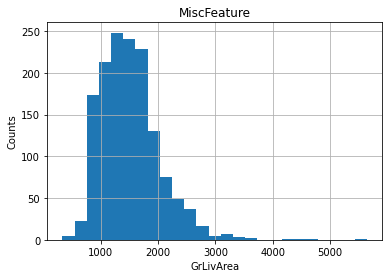

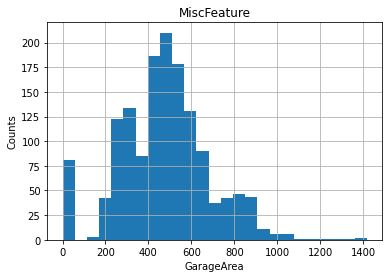

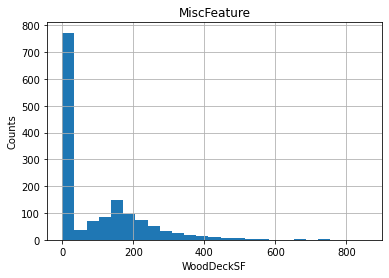

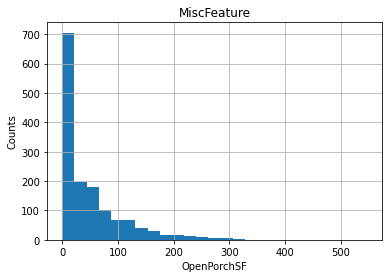

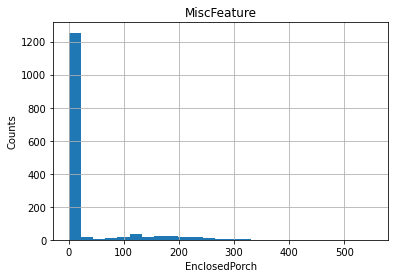

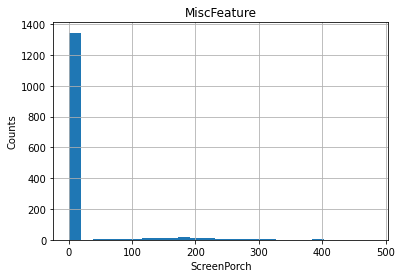

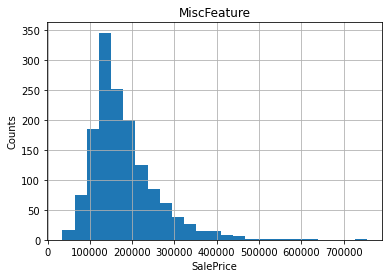

In [13]:
## Analyze the continuous features by plotting it into histogram

for feature in continuous_features:
    data=dataset.copy()
    data[feature].hist(bins=25)  ## or dataset[feature].hist(bins=25) 
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.title(features)
    plt.show()
#     print(dataset.equals(data))   Just for see copy is needed or not in above to plot graph

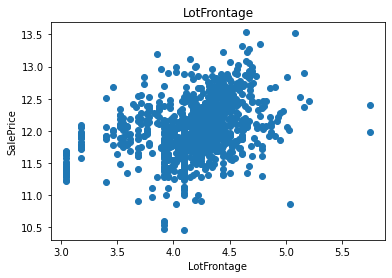

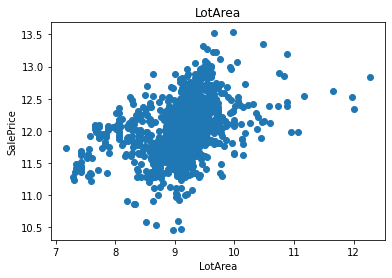

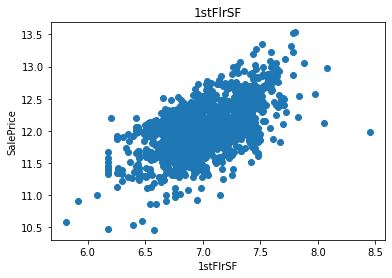

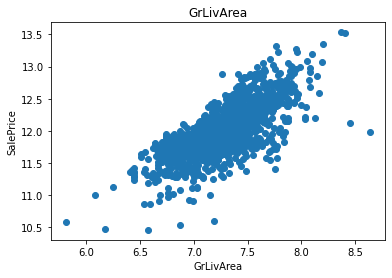

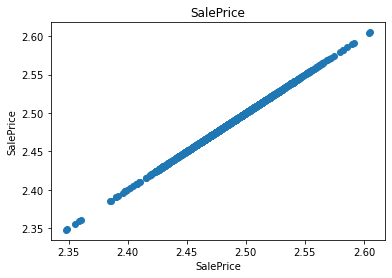

In [18]:
## We will be using logarithm transformatino

for feature in continuous_features:
    data = dataset.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

### Outliers

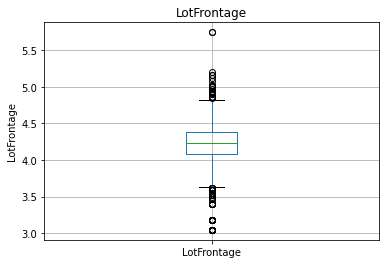

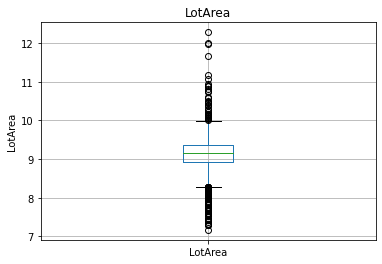

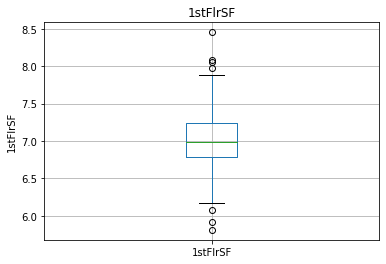

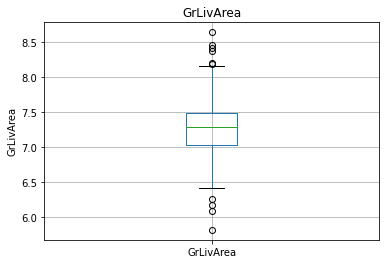

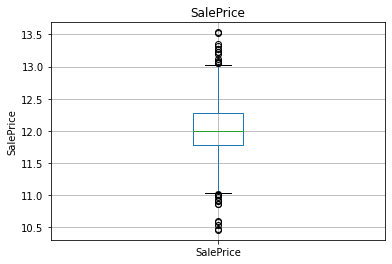

In [20]:
for feature in continuous_features:
    data = dataset.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Catagorical Variables

In [21]:
catagorical_features = [feature for feature in dataset.columns if dataset[feature].dtype=='O']
catagorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
for feature in catagorical_features:
    print("Feature {} with {} unique values".format(feature,len(dataset[feature].unique())))

Feature MSZoning with 5 unique values
Feature Street with 2 unique values
Feature Alley with 3 unique values
Feature LotShape with 4 unique values
Feature LandContour with 4 unique values
Feature Utilities with 2 unique values
Feature LotConfig with 5 unique values
Feature LandSlope with 3 unique values
Feature Neighborhood with 25 unique values
Feature Condition1 with 9 unique values
Feature Condition2 with 8 unique values
Feature BldgType with 5 unique values
Feature HouseStyle with 8 unique values
Feature RoofStyle with 6 unique values
Feature RoofMatl with 8 unique values
Feature Exterior1st with 15 unique values
Feature Exterior2nd with 16 unique values
Feature MasVnrType with 5 unique values
Feature ExterQual with 4 unique values
Feature ExterCond with 5 unique values
Feature Foundation with 6 unique values
Feature BsmtQual with 5 unique values
Feature BsmtCond with 5 unique values
Feature BsmtExposure with 5 unique values
Feature BsmtFinType1 with 7 unique values
Feature BsmtFin

In [23]:
## Find out relationship b/w catagorical variables and dependent features

for feature in catagorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()